In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def ploteig(set_num, filename, xlow, xhigh, ylow, yhigh): 
    # Load in the data and put into array
    data1 = pd.read_csv(str(filename), header=None)
    x1 = np.array(data1.iloc[:,0])
    y1 = np.array(data1.iloc[:,1])

    ## EIGENVALUES AND COVARIANCE 
    # To do cov function manually ...
    # Create one array for x and y
    data1_temp = np.stack((x1,y1), axis=1)
    # Calculate mean for each column
    mean1 = data1_temp.mean(axis=0) 
    # Center around mean for each column
    data1_temp -= data1_temp.mean(axis=0)
    # Calculate the covariance matrix
    covariance_man = (np.dot(data1_temp.T, data1_temp))/(data1_temp.shape[0] - 1)
    # Print results
    print('Data Set ', set_num)
    print('Covariance:\n', covariance_man)

    # Shortcut for covariance matrix
    data1 = np.stack((x1,y1), axis=0)
    cov1 = np.cov(data1)

    # Create a column of 1's for the x0 column
    x0 = np.ones(shape=(len(x1)))   
    # Add it to the matrix
    data1_temp2 = np.stack((x0,x1,y1), axis=1)
    X1 = np.stack((x0,x1), axis=1)
    
    # Calculate the eigen values of the covariance matrix
    eig_vals, eig_vecs = np.linalg.eig(covariance_man)
    print('Eigen values:\n', eig_vals)
    print('Eigen vector:\n', eig_vecs)
    
    # Multiply the square root of the eigen value with its appropriate eigen vector for the two eigen values
    pc = np.array([eig_vecs[:,0]*(np.sqrt(eig_vals[0])), eig_vecs[:,1]*(np.sqrt(eig_vals[1]))])
    pc1 = pc[0,:]
    pc2 = pc[1,:]
    # Get the mean from which the eigenvector will originate
    newmean = np.mean(data1,axis=1)
    ## Plot the eigendecomposition of the covariance matrix
    p1 = plt.figure()
    plt.plot(x1,y1, '.')
    plt.xlim(xlow, xhigh)
    plt.ylim(ylow, yhigh)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Eigendecomposition of Covariance')
    plt.gca().set_aspect('equal',adjustable='box')
    # Plot the PCA analysis
    plt.quiver(*newmean, *pc1*100, scale=1, color=['r'], scale_units='xy')
    plt.quiver(*newmean, *pc1*(-100), scale=1, color=['r'], scale_units='xy')
    plt.quiver(*newmean, *pc2*100, scale=1, color=['b'], scale_units='xy')
    plt.quiver(*newmean, *pc2*(-100), scale=1, color=['b'], scale_units='xy')
    
    

Data Set  1
Covariance:
 [[3881.30854873 1897.16347756]
 [1897.16347756 1557.15527689]]
Eigen values:
 [4944.01310842  494.4507172 ]
Eigen vector:
 [[ 0.87244857 -0.48870594]
 [ 0.48870594  0.87244857]]


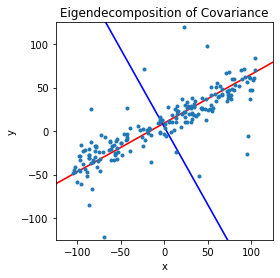

In [2]:
ploteig(1, "data1.csv", -125, 125, -125, 125)

Data Set  2
Covariance:
 [[4009.90897767 1254.18758668]
 [1254.18758668 5061.81312378]]
Eigen values:
 [3175.85660745 5895.865494  ]
Eigen vector:
 [[-0.83268487 -0.55374714]
 [ 0.55374714 -0.83268487]]


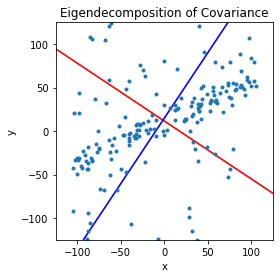

In [3]:
ploteig(2, "data2.csv", -125, 125, -125, 125)

Data Set  3
Covariance:
 [[5323.21579667 1287.3553616 ]
 [1287.3553616  3089.30719815]]
Eigen values:
 [5910.62963067 2501.89336415]
Eigen vector:
 [[ 0.90976591 -0.41512165]
 [ 0.41512165  0.90976591]]


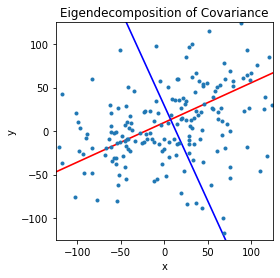

In [4]:
ploteig(3, "data3.csv", -125, 125, -125, 125)

Data Set  4
Covariance:
 [[ 1.09281499 -0.81163511]
 [-0.81163511  0.6997545 ]]
Eigen values:
 [1.73137497 0.06119452]
Eigen vector:
 [[ 0.78591989  0.61832834]
 [-0.61832834  0.78591989]]


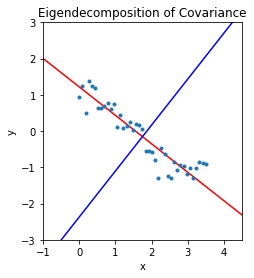

In [5]:
ploteig(4, "data4.csv", -1, 4.5, -3, 3)